# Case: Prevendo a Evasão de Clientes (Churn Prediction)

A evasão de clientes representa uma das maiores ameaças à saúde financeira de qualquer empresa. Neste estudo, utilizaremos técnicas de Ciência de Dados para prever quais clientes têm maior probabilidade de cancelar seus serviços ou produtos. Através da análise de dados históricos e comportamentais, construiremos um modelo preditivo capaz de identificar os sinais de alerta e auxiliar na implementação de estratégias de retenção proativas.

## Sobre o conjunto de dados

O conjunto de dados "Telco Customer Churn" disponibilizado no Kaggle oferece um rico repositório de informações sobre clientes de uma empresa de telecomunicações. Essa base de dados é amplamente utilizada em projetos de ciência de dados para desenvolver modelos preditivos capazes de identificar quais clientes têm maior probabilidade de cancelar seus serviços.

O dataframe possui 7043 linhas, cada linha corresponde a um cliente individual e 21 colunas, que representam o número de variáveis ou características coletadas para cada cliente.

#### Nomes das Colunas:

- **customerID:** Identificador único para cada cliente.
- **gender:** Gênero do cliente (Masculino/Feminino).
- **SeniorCitizen:** Indica se o cliente é idoso (1 - Sim, 0 - Não).
- **Partner:** Indica se o cliente possui um parceiro (Yes/No).
- **Dependents:** Indica se o cliente possui dependentes (Yes/No).
- **tenure:** Duração da assinatura do serviço (em meses).
- **PhoneService:** Indica se o cliente possui serviço de telefonia (Yes/No).
- **MultipleLines:** Indica se o cliente possui múltiplas linhas telefônicas (Yes/No, No phone service).
- **InternetService:** Tipo de serviço de internet (DSL, Fiber optic, No).
- **OnlineSecurity:** Indica se o cliente possui serviço de segurança online (Yes/No, No internet service).
- **OnlineBackup:** Indica se o cliente possui serviço de backup online (Yes/No, No internet service).
- **DeviceProtection:** Indica se o cliente possui proteção de dispositivos (Yes/No, No internet service).
- **TechSupport:** Indica se o cliente possui suporte técnico (Yes/No, No internet service).
- **StreamingTV:** Indica se o cliente utiliza o serviço de streaming de TV (Yes/No, No internet service).
- **StreamingMovies:** Indica se o cliente utiliza o serviço de streaming de filmes (Yes/No, No internet service).
- **Contract:** Tipo de contrato do cliente (Month-to-month, One year, Two year).
- **PaperlessBilling:** Indica se o cliente recebe faturas eletrônicas (Yes/No).
- **PaymentMethod:** Método de pagamento utilizado pelo cliente.
- **MonthlyCharges:** Valor mensal da assinatura.
- **TotalCharges:** Valor total pago pelo cliente.
- **Churn:** Variável alvo, indicando se o cliente cancelou o serviço (Yes/No).

Fonte de dados e informações:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Etapas do projeto:

- Coleta dos dados:
  1. Importar os pacotes e dataset necessários
  2. Leitura do Arquivo
- Limpeza e preparação dos dados
- Exploração dos dados
- Modelagem dos dados
- Algoritmos de Machine Learning
- Avaliar desempenho dos modelos usando as métricas corretas

## Importando as bibliotécas necessárias

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

## Lendo o arquivo CSV

In [207]:
df= pd.read_csv("Telco-Customer-Churn.csv")

## Visualizando o shape, as primeiras e ultimas 5 linhas do dataset com 'display'

In [208]:
display(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Visualizando informações básicas do dataset

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observamos que a coluna 'TotalCharges', que representa o valor total pago pelo cliente, está atualmente classificada como tipo 'object', enquanto o tipo numérico 'float64' seria mais adequado para valores monetários. Para corrigir essa discrepância, aplicaremos a função pd.to_numeric. 

In [210]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

Podemos observar que o Pandas não conseguiu converter uma string (texto) específica na posição 488 da coluna TotalCharges. Vamos utilizar um método que substitui os valores problemáticos por um valor especial que indica que o dado está faltando ou é inválido.

In [211]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Podemos observar que a coluna TotalCharges foi alterada para o tipo mais apropriado que é o float64.

## Verificando se há algum valor nulo

In [213]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Excluindo as linhas com valores nulos

Observamos que a coluna 'TotalCharges' apresenta 11 valores nulos. Considerando o tamanho total do nosso conjunto de dados (7043 linhas), optamos por excluir essas linhas para este estudo. Entendemos que a perda de tão poucas observações não comprometerá significativamente a análise. No entanto, em um cenário real, essa decisão poderia ser reavaliada em conjunto com a equipe de negócios. Uma outra abordagem, seria a substituição desses valores pela mediana do total somado de todos os valores desta coluna. 

In [214]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [215]:
df.shape

(7032, 21)

Ao analisar a coluna "MultipleLines", identificamos três categorias: "Yes", "No" e "No phone service". Entendemos que "No phone service" é equivalente a "No". Padronizaremos essa coluna para evitar ambiguidades. Verificaremos se outras colunas apresentam categorizações semelhantes e realizaremos os ajustes necessários.

In [216]:
for i in df:
    if df[i].dtypes=='object':
        print(f'{i} : {df[i].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Observamos a mesma necessidade de ajusta em relação a frase 'No internet service'

In [217]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [218]:
display(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Modelos de Machine Learning geralmente trabalham melhor com dados numéricos. Uma forma de resolver esse problema é a criação de colunas dummies. A criação de colunas dummies permite que os algoritmos utilizem essas informações de forma mais eficaz.

In [219]:
# Lista das colunas categóricas
cols_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Criando dummies para as colunas categóricas
df_dummies = pd.get_dummies(df, columns=cols_to_encode, drop_first=True) 

Por fim, vamos excluir a coluna customerID que não é relevante para nossa análise

In [220]:
df_dummies = df_dummies.drop(columns=['customerID'])

In [221]:
display(df_dummies)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,1,1,...,0,1,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,1


# Análise Exploratória dos dados (EDA)

In [222]:
df_dummies.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.504693,0.482509,0.298493,0.903299,0.421928,0.440273,...,0.290102,0.384386,0.388367,0.209329,0.239619,0.592719,0.216297,0.336320,0.228100,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.500014,0.499729,0.457629,0.295571,0.493902,0.496455,...,0.453842,0.486484,0.487414,0.406858,0.426881,0.491363,0.411748,0.472483,0.419637,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


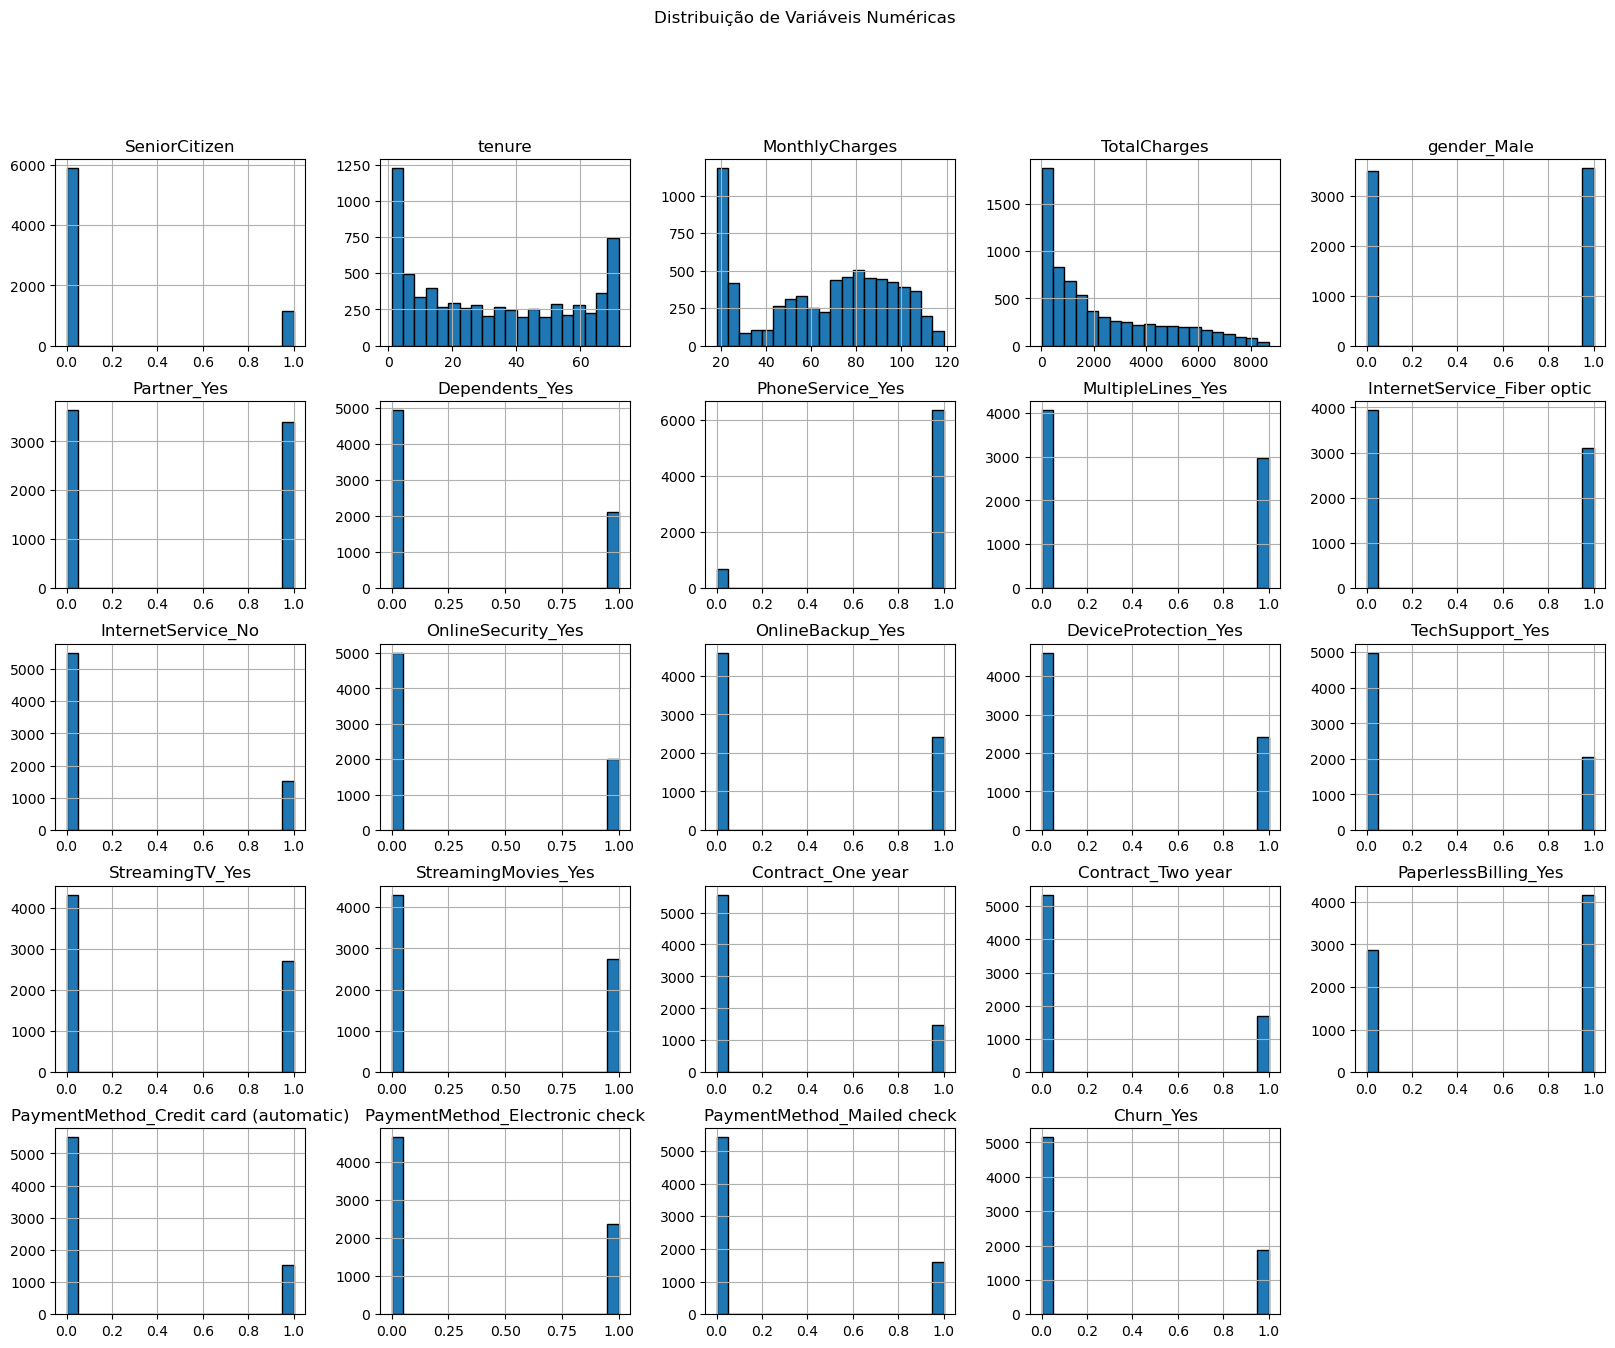

In [223]:
# Histograma para variáveis numéricas
df_dummies.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distribuição de Variáveis Numéricas")
plt.show()

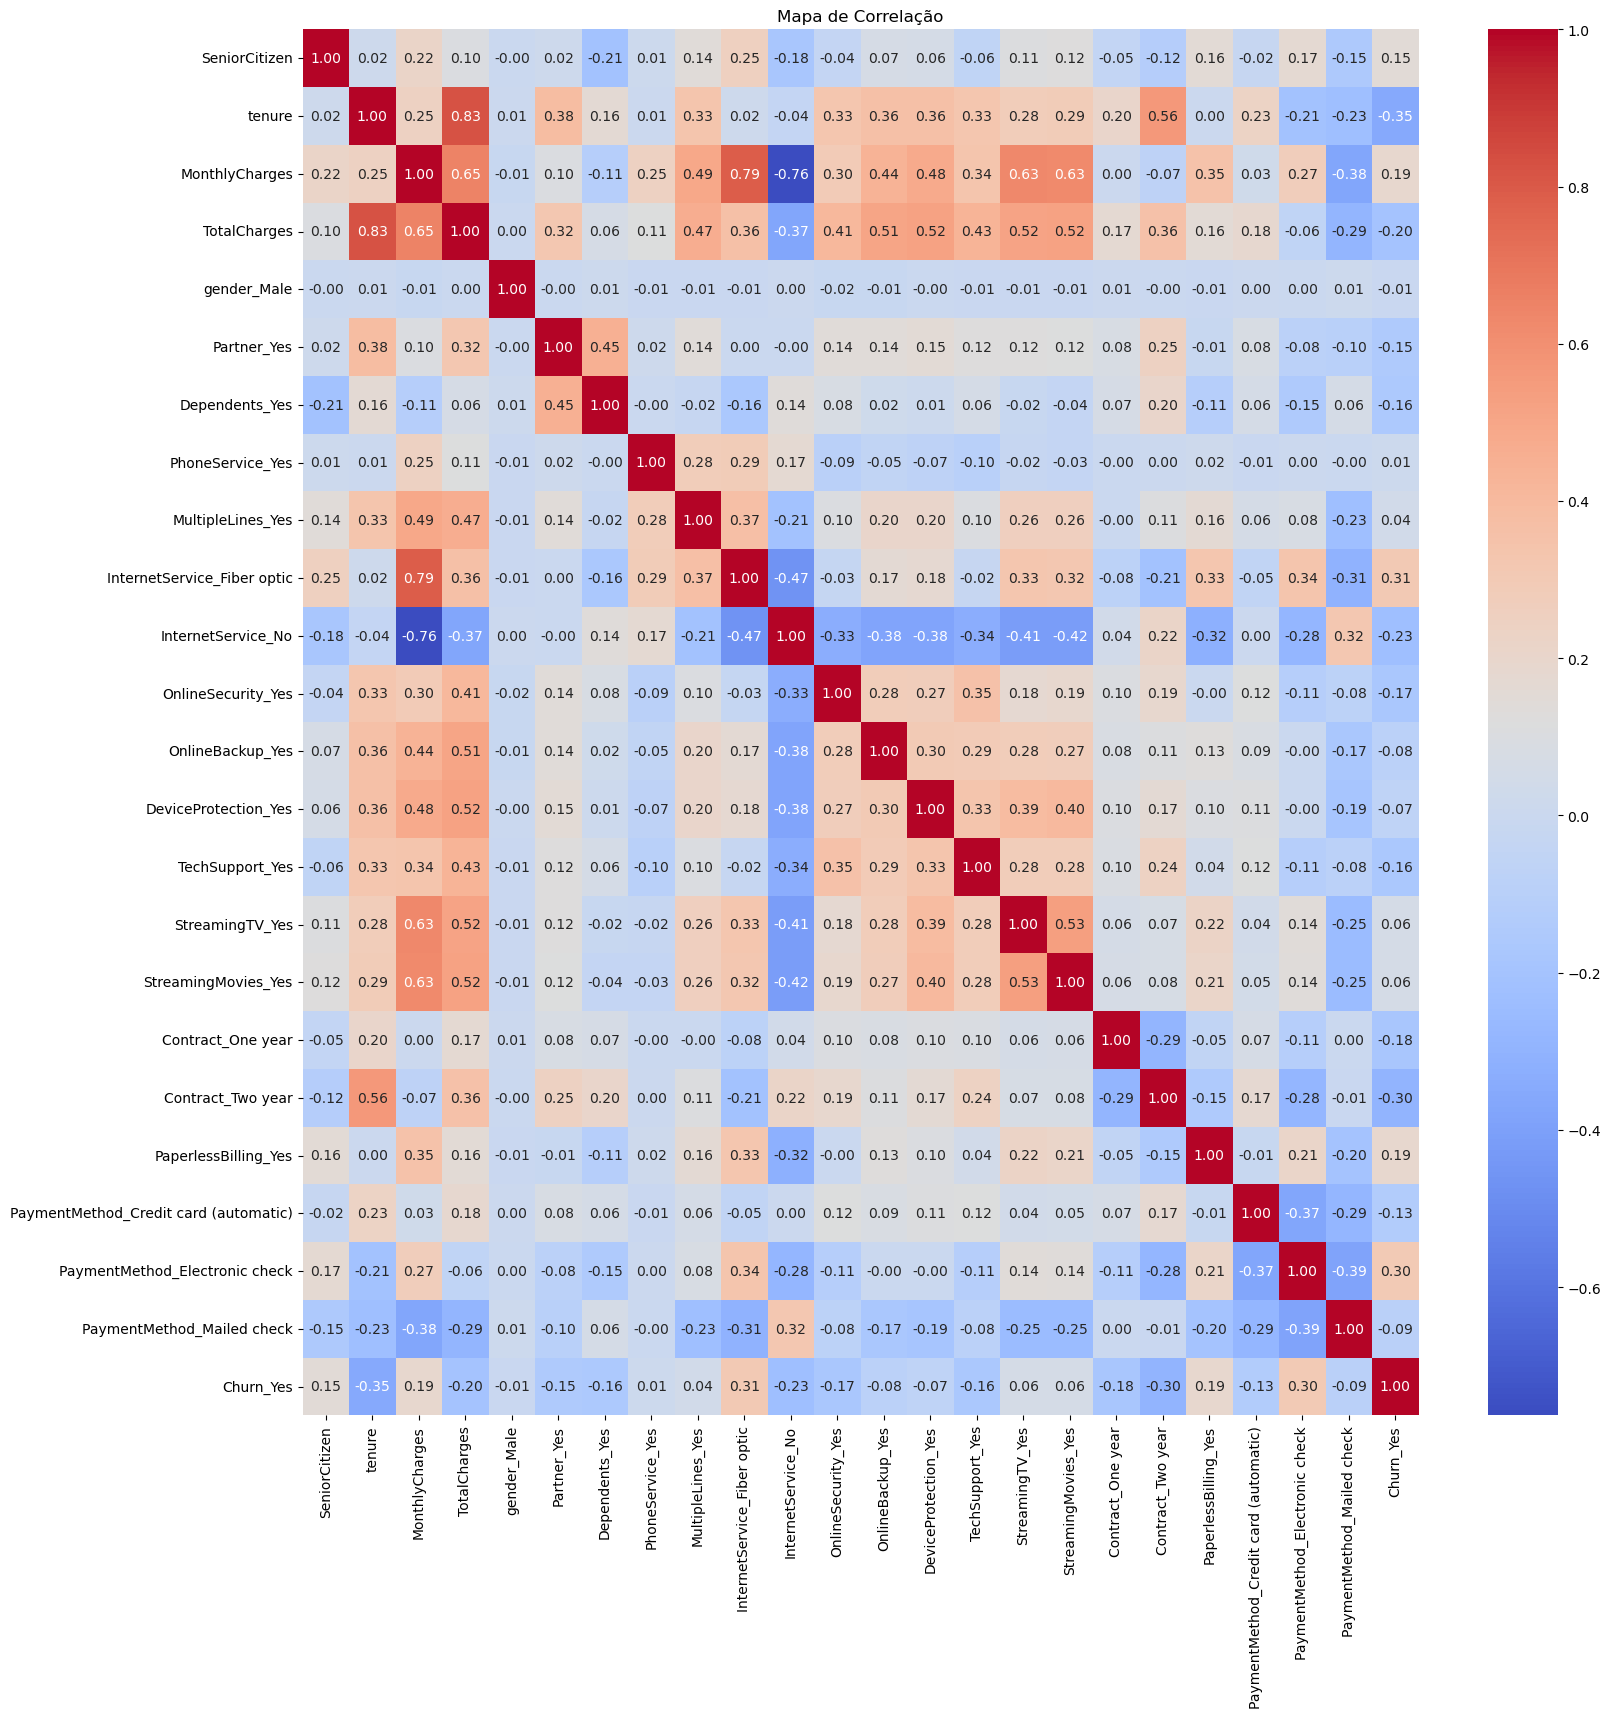


Correlação com Churn:
Churn_Yes                                1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270
Contract_One year          

In [224]:
# Calcular correlação para variáveis numéricas
correlacoes = df_dummies.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

# Identificar variáveis mais correlacionadas com o churn
correlacao_churn = correlacoes['Churn_Yes'].sort_values(ascending=False)
print("\nCorrelação com Churn:")
print(correlacao_churn)

Com base na correlação apresentada, podemos identificar as variáveis mais relevantes (positivas e negativas) em relação ao churn, assim como algumas ideias iniciais de interpretação:

##  Variáveis com correlação positiva com churn (maior probabilidade de churn):

1. **InternetService_Fiber optic:** Clientes com fibra óptica parecem ter uma maior probabilidade de churn, talvez devido a questões como custo ou insatisfação com o serviço.
2. **PaymentMethod_Electronic check:** Quem utiliza pagamento por cheque eletrônico tem maior chance de churn, possivelmente por problemas de facilidade ou confiança nesse método de pagamento.
3. **MonthlyCharges:** Clientes com cobranças mensais mais altas têm maior probabilidade de churn, sugerindo sensibilidade ao preço.
4. **PaperlessBilling_Yes:** Clientes com cobrança eletrónica também apresentam maior churn, possivelmente associado a experiências ruins com sistemas digitais.
5. **SeniorCitizen:** Idosos têm maior probabilidade de churn, o que pode refletir preferências diferentes ou dificuldade com tecnologia.

## Variáveis com correlação negativa com churn (menor probabilidade de churn): 

1. **tenure:** Clientes com maior tempo de contrato (tenure) tendem a permanecer, o que indica que a fidelidade aumenta com o tempo.
2. **Contract_Two year:** Contratos de dois anos estão associados a menor churn, provavelmente devido à estabilidade oferecida.
3. **InternetService_No:** Clientes que não possuem internet têm menor probabilidade de churn, possivelmente devido ao foco apenas em serviços básicos.
4. **TotalCharges:** Cobranças totais mais altas estão negativamente associadas ao churn, indicando que clientes de longa data são menos propensos a cancelar.
5. **TechSupport_Yes:** Clientes com suporte técnico ativo têm menor churn, sugerindo que suporte de qualidade é um fator importante de retenção.

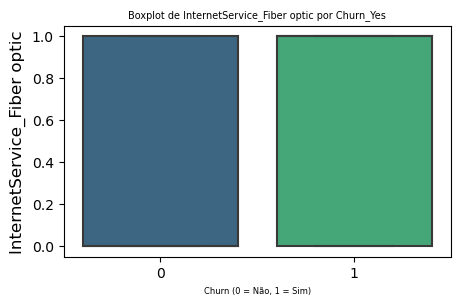

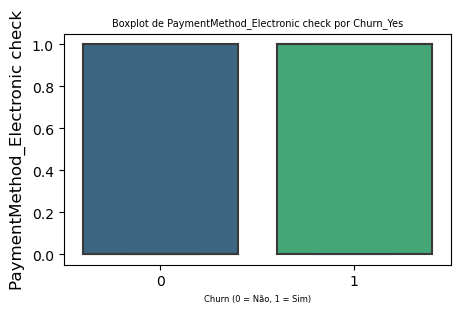

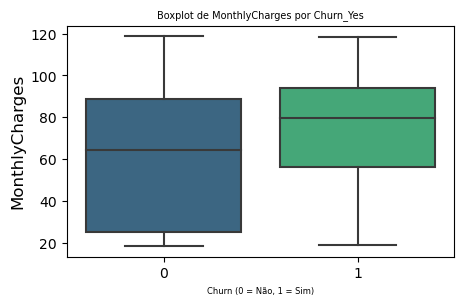

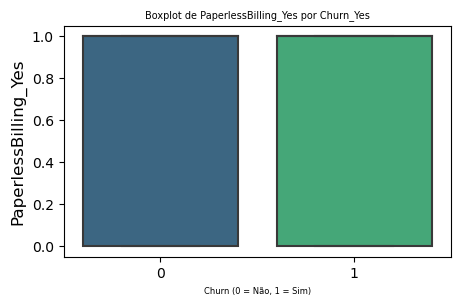

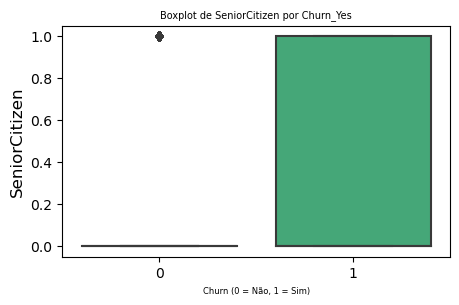

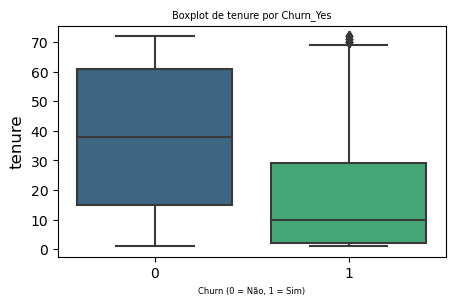

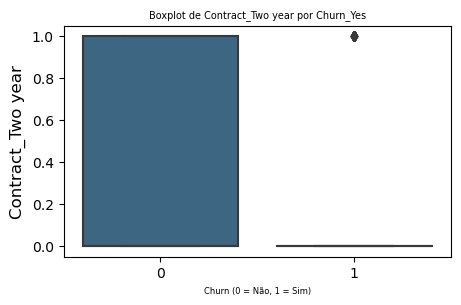

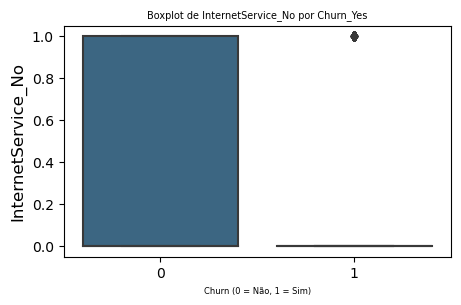

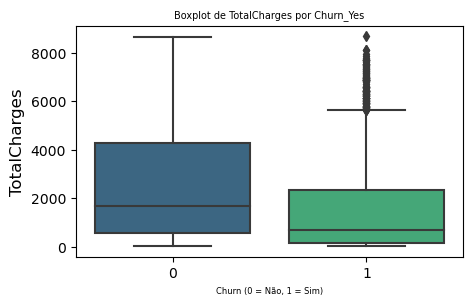

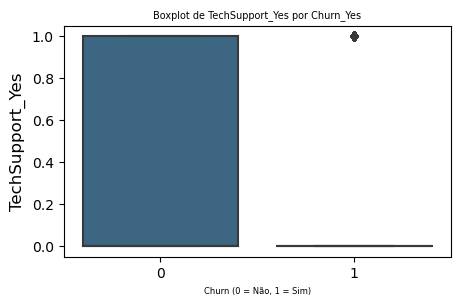

In [225]:
# Lista de colunas
columns = [
    "InternetService_Fiber optic",
    "PaymentMethod_Electronic check",
    "MonthlyCharges",
    "PaperlessBilling_Yes",
    "SeniorCitizen",
    "tenure",
    "Contract_Two year",
    "InternetService_No",
    "TotalCharges",
    "TechSupport_Yes"
]

# Criar gráficos
for col in columns:
    plt.figure(figsize=(5, 3))
    
    # Boxplot
    sns.boxplot(data=df_dummies, x='Churn_Yes', y=col, palette='viridis')
    plt.title(f"Boxplot de {col} por Churn_Yes", fontsize=7)
    plt.xlabel("Churn (0 = Não, 1 = Sim)", fontsize=6)
    plt.ylabel(col, fontsize=12)
    plt.show()

## Insights baseados nos dados:

1. **Preço e método de pagamento:**
- Clientes com cobranças mensais altas e que utilizam cheque eletrônico têm maior probabilidade de churn. Estratégias como descontos para serviços de fibra óptica ou facilitação de pagamento (como débito automático) podem ajudar a reduzir o churn.

2. **Idosos e tecnologia:**
- Idosos mostram maior churn. Oferecer suporte dedicado e interfaces simples pode aumentar a retenção nesse segmento.

3. **Fidelização com contratos:**
- Contratos mais longos (um ou dois anos) e maior tempo de contrato estão associados a menor churn. Estratégias para incentivar renovações e oferecer descontos para contratos mais longos podem ser eficazes.

4. **Serviços adicionais:**
- Clientes com suporte técnico e segurança online apresentam menor churn. Isso indica que promover serviços adicionais pode aumentar a retenção.

## MinMaxScaler e sua Aplicação

O MinMaxScaler é uma técnica de pré-processamento de dados que normaliza os valores numéricos de um conjunto de dados para um intervalo específico, geralmente entre 0 e 1. Essa normalização é crucial em diversas tarefas de aprendizado de máquina.
As colunas 'tenure', 'MonthlyCharges' e 'TotalCharges' apresentam valores muito discrepantes dos demais. Vamos normaliza-los,

In [226]:
# Cria um objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleciona as colunas a serem escaladas
colunas_a_escalar = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Aplica o scaler às colunas selecionadas
df_dummies[colunas_a_escalar] = scaler.fit_transform(df[colunas_a_escalar])

In [227]:
display(df_dummies)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.000000,0.115423,0.001275,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0.464789,0.385075,0.215867,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0.014085,0.354229,0.010310,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,0.619718,0.239303,0.210241,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0.014085,0.521891,0.015330,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,1,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,0
7039,0,1.000000,0.845274,0.847461,0,1,1,1,1,1,...,0,1,1,1,0,1,1,0,0,0
7040,0,0.140845,0.112935,0.037809,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,0.042254,0.558706,0.033210,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,1


## Balanceamento dos dados

O balanceamento de dados é uma técnica utilizada em problemas de classificação quando há um desbalanceamento significativo entre as classes, ou seja, quando uma classe possui muito mais exemplos do que a outra. Esse desbalanceamento pode levar os modelos de machine learning a priorizarem a classe majoritária, reduzindo a capacidade de identificar corretamente a classe minoritária, que muitas vezes é a mais relevante para o negócio, como no caso de previsões de churn.

Para corrigir esse problema, podem ser aplicadas técnicas como **oversampling**, que aumenta o número de exemplos da classe minoritária (ex.: SMOTE), **undersampling**, que reduz o número de exemplos da classe majoritária, ou o uso de **class weights**, que ajusta os pesos das classes no modelo para equilibrar sua influência durante o treinamento. O objetivo do balanceamento é melhorar métricas como recall e F1-score da classe minoritária, garantindo que o modelo seja mais eficaz na identificação de casos relevantes, sem depender apenas de acurácia geral, que pode ser enganosa em cenários desbalanceados.

In [228]:
# Contando o número de 0s e 1s na coluna Churn_Yes
churn_counts = df_dummies['Churn_Yes'].value_counts()

# Exibindo os resultados
print("Número de clientes que não realizaram churn (0 - No):", churn_counts[0])
print("Número de clientes que realizaram churn (1 - Yes):", churn_counts[1])

Número de clientes que não realizaram churn (0 - No): 5163
Número de clientes que realizaram churn (1 - Yes): 1869


In [229]:
# Separando os dados em features (X) e target (y)
X = df_dummies.drop('Churn_Yes', axis=1)
y = df_dummies['Churn_Yes']

# Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Aplicando o SMOTE nos dados de treino
smote = SMOTE(random_state=10)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Criando o DataFrame balanceado
df_balanced = pd.concat([pd.DataFrame(x_train_balanced, columns=X.columns), 
                         pd.DataFrame(y_train_balanced, columns=['Churn_Yes'])], axis=1)

# Verificando o balanceamento no novo DataFrame
print("Distribuição de classes no DataFrame balanceado:")
print(df_balanced['Churn_Yes'].value_counts())

Distribuição de classes no DataFrame balanceado:
0    3612
1    3612
Name: Churn_Yes, dtype: int64


## Modelos de Machine Learning

Para este trabalho, utilizaremos o RandomForestClassifier e a Logistic Regression.

- **RandomForestClassifier** é robusto, captura relações complexas entre variáveis, lida bem com dados ruidosos e fornece a importância das variáveis, sendo ideal para problemas não lineares.


- **Logistic Regression** é simples, interpretável, rápida para treinar e fornece probabilidades claras de churn, sendo útil para comunicar insights a públicos não técnicos.

Esses dois modelos se complementam: o Random Forest destaca variáveis importantes em problemas complexos, enquanto a Regressão Logística é ideal como baseline e para análise de relações diretas entre variáveis e churn. Comparar ambos ajuda a avaliar abordagens lineares e não lineares.

## Aplicando o modelo RandomForestClassifier

In [230]:
model_rfc = RandomForestClassifier()
model_rfc = model_rfc.fit(x_train,y_train)
y_predict = model_rfc.predict(x_test)

In [231]:
# Acurácia
accuracy = accuracy_score(y_test, y_predict)
print(f"Acurácia: {accuracy:.2f}")

# F1-Score
f1 = f1_score(y_test, y_predict)
print(f"F1-Score: {f1:.2f}")

# AUC-ROC
y_probs = model_rfc.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC: {auc_roc:.2f}")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_predict))

Acurácia: 0.79
F1-Score: 0.56
AUC-ROC: 0.83

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1551
           1       0.62      0.52      0.56       559

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



## Avaliando os resultados

1. **Para a classe 0 (Não Churn):**
- **Precision:** 0.84: Quando o modelo prevê que o cliente não fará churn, ele está correto 84% das vezes.
- **Recall:** 0.88: O modelo conseguiu identificar 88% dos clientes que não fizeram churn.
- **F1-Score:** 0.86: A combinação entre precision e recall é muito boa para a classe "não churn", mostrando que o modelo se saiu bem ao prever clientes que não saíram.

2. **Para a classe 1 (Churn):**
- **Precision:** 0.62: Quando o modelo prevê que o cliente fará churn, ele está certo apenas 62% das vezes, o que é um resultado razoável.
- **Recall:** 0.52: O modelo identificou 52% dos clientes que realmente fizeram churn, o que é relativamente baixo, significando que o modelo perdeu uma boa parte dos clientes que realmente fariam churn.
- **F1-Score:** 0.56: Este valor também é baixo, refletindo a dificuldade do modelo em identificar corretamente os clientes que fazem churn.

## Conclusão

- O modelo tem um desempenho bom na classe majoritária (não churn), mas está falhando em identificar clientes que fazem churn, o que é crucial para estratégias de retenção.
- A AUC-ROC boa indica que o modelo tem potencial para melhorar com ajustes (ajustes de parâmetros ou uso de modelos mais complexos).
- Uma melhoria na precisão e recall para a classe 1 (churn) pode aumentar significativamente a utilidade do modelo.

## Aplicando o modelo Logistic Regression

In [232]:
# Criando e treinando o modelo de Regressão Logística
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(x_train, y_train)

# Fazendo previsões
y_pred = log_reg_model.predict(x_test)

In [233]:
# Calculando as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg_model.predict_proba(x_test)[:, 1])

# Imprimindo as métricas
print(f'Acurácia: {accuracy:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Exibindo o Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.81
F1-Score: 0.61
AUC-ROC: 0.86

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1551
           1       0.66      0.57      0.61       559

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



## Avaliando os resultados

1. **Classe 0 (Não Churn):**

- **Precision (0.85):** O modelo tem uma boa precisão ao prever clientes que não vão churn (85% de acerto).
- **Recall (0.89):** O modelo tem um recall ainda melhor (89%), ou seja, ele consegue identificar a maior parte dos clientes que não realizarão churn.
- **F1-Score (0.87):** O F1-Score para a classe 0 é alto, indicando um bom equilíbrio entre precisão e recall.

2. **Classe 1 (Churn):**

- **Precision (0.66):** O modelo tem uma precisão menor para prever churn, ou seja, há mais falsos positivos (clientes que o modelo previu como churn, mas que não realizarão).
- **Recall (0.57):** O recall de 57% indica que o modelo não está conseguindo identificar todos os clientes que efetivamente irão churn. Ou seja, está perdendo muitas dessas previsões.
- **F1-Score (0.61):** O F1-Score é razoável, mas ainda abaixo do desejado, indicando que o modelo não é tão equilibrado para prever churn.

## Conclusão

O modelo está funcionando bem para identificar clientes que não vão churn, mas ainda pode melhorar para identificar clientes de churn com maior precisão e recall.

## Comparação entre os modelos RandomForestClassifier e Logistic Regression

1. **RandomForestClassifier**
- **Vantagens:**

  - O desempenho para a classe 0 (Não Churn) é muito bom, com um F1-Score de 0.86. Isso significa que o modelo é eficaz para prever os clientes que não irão churn.  
  - Tem uma precisão razoável para a classe 1 (Churn) (62%), o que indica que, quando prevê churn, é moderadamente confiável.
  
  
- **Desvantagens:**

  - O recall para a classe 1 (Churn) é baixo (52%), o que significa que muitos clientes que realmente farão churn não são detectados.  
  - O F1-Score para a classe 1 (Churn) é 0.56, indicando dificuldades em equilibrar precisão e recall para essa classe.

2. **Logistic Regression**
- **Vantagens:**
  - O modelo apresenta melhor desempenho geral, especialmente para a classe 1 (Churn), com um F1-Score de 0.61 (comparado a 0.56 no RandomForestClassifier).
  - O recall da classe 1 (Churn) é maior (57%), identificando mais clientes que realmente farão churn.
  - Para a classe 0 (Não Churn), o modelo também apresenta bom desempenho com um F1-Score de 0.87.
  
  
- **Desvantagens:**
  - Embora melhor que o RandomForestClassifier para churn, a precisão da classe 1 (Churn) ainda é moderada (66%), indicando a presença de falsos positivos.

## Considerações Finais

Ambos os modelos têm seus pontos fortes e fracos, mas para este trabalho, onde prever a classe 1 (Churn) é crucial para estratégias de retenção de clientes, o modelo Logistic Regression é a melhor escolha. Ele apresenta:

   - Melhor F1-Score para a classe 1 (Churn) (0.61 contra 0.56 no RandomForestClassifier).
   - Melhor recall para identificar clientes que farão churn (57% contra 52% no RandomForestClassifier).
    
Embora o RandomForestClassifier seja levemente melhor para prever a classe 0 (Não Churn), a prioridade é prever quem fará churn, e nesse aspecto, o **Logistic Regression** se sai melhor.